# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [10]:
print(2609525)

2609525


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [11]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [12]:
# Write your own code here
Dataset=pd.read_csv("data/bmi.csv")
BMI = lambda weight,height:weight/((height/100)**2)
Dataset["BMI"]=list(map(BMI,Dataset["Weight"],Dataset["Height"]))
Dataset["BMI"]=round(Dataset["BMI"],2)
display(Dataset)


,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48
...,...,...,...,...,...
495,Female,150,153,5,68.00
496,Female,184,121,4,35.74
497,Female,141,136,5,68.41
498,Male,150,95,5,42.22


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

In [13]:
wdi_2020 = pd.read_csv("data/wdi_2020.csv")

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [14]:
# Write your own code here
dataset_2020 = pd.read_csv('data/wdi_2020.csv')
fn_upper = lambda countryname : countryname.upper()
dataset_2020["countryname_upper"] = dataset_2020["countryname"].apply(fn_upper)
print(dataset_2020["countryname"])
print(dataset_2020["countryname_upper"])

0                      Afghanistan
1      Africa Eastern and Southern
2       Africa Western and Central
3                          Albania
4                          Algeria
                  ...             
261             West Bank and Gaza
262                          World
263                    Yemen, Rep.
264                         Zambia
265                       Zimbabwe
Name: countryname, Length: 266, dtype: object
0                      AFGHANISTAN
1      AFRICA EASTERN AND SOUTHERN
2       AFRICA WESTERN AND CENTRAL
3                          ALBANIA
4                          ALGERIA
                  ...             
261             WEST BANK AND GAZA
262                          WORLD
263                    YEMEN, REP.
264                         ZAMBIA
265                       ZIMBABWE
Name: countryname_upper, Length: 266, dtype: object


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [15]:
# Write your code here
urbanpopulation = dataset_2020.sort_values(by = "prop_urbanpopulation", ascending = True)
urbanpopulation.iloc[0:5,:]

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
191,2020,YR2020,Papua New Guinea,PNG,13.345,PAPUA NEW GUINEA
34,2020,YR2020,Burundi,BDI,13.708,BURUNDI
141,2020,YR2020,Liechtenstein,LIE,14.416,LIECHTENSTEIN
177,2020,YR2020,Niger,NER,16.626,NIGER
149,2020,YR2020,Malawi,MWI,17.427,MALAWI


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [16]:
# Write your own code here
import numpy as np
df = pd.DataFrame(urbanpopulation)
quantile_25 = np.nanpercentile(df['prop_urbanpopulation'], 25)
subset_df = df.query('prop_urbanpopulation > @ quantile_25')
print(subset_df)

     year yearcode                countryname countrycode  \
145  2020   YR2020        Lower middle income         LMC   
67   2020   YR2020           Egypt, Arab Rep.         EGY   
241  2020   YR2020                       Togo         TGO   
163  2020   YR2020                    Moldova         MDA   
211  2020   YR2020               Sierra Leone         SLE   
..    ...      ...                        ...         ...   
171  2020   YR2020                      Nauru         NRU   
90   2020   YR2020                  Gibraltar         GIB   
164  2020   YR2020                     Monaco         MCO   
213  2020   YR2020  Sint Maarten (Dutch part)         SXM   
24   2020   YR2020                    Bermuda         BMU   

     prop_urbanpopulation          countryname_upper  
145              42.50561        LOWER MIDDLE INCOME  
67               42.78300           EGYPT, ARAB REP.  
241              42.80000                       TOGO  
163              42.84900                    MO

<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


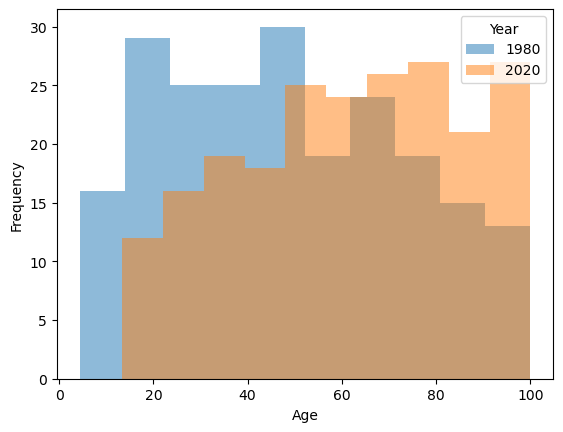

In [17]:
# Write your own code here
data_urban = pd.read_csv("data/wdi_urban.csv")
list_unique_year = pd.unique(data_urban["year"])

for year in list_unique_year:
    df = data_urban.query("year == @ year")
    plt.hist(x = df["prop_urbanpopulation"], alpha = 0.5)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(labels = list_unique_year, title = "Year")
plt.show()